# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 

### Read the csv data into a pandas dataframe and display the first 5 samples

In [11]:

df = pd.read_csv("Real estate.csv")

df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


### Find how many samples are there and how many columns are there in the dataset

In [14]:
df.shape

(414, 8)

### What are the features available in the dataset?

In [20]:
features = df.columns
print(features)

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


### Check if any features have missing data

In [27]:
missing_data = df.isnull().sum()
print(missing_data)

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


### Group all the features as dependent features in X

In [29]:
X = df.drop(columns=['Y house price of unit area'])
X.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


### Group feature(s) as independent features in y

In [32]:
y=df.iloc[:,-1]
print(y.head())

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64


### Split the dataset into train and test data

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =1 )

### Choose the model (Linear Regression)

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

### Create an Estimator object

In [40]:
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)



### Train the model

In [41]:
model.fit(X_train, y_train)

LinearRegression()

### Apply the model

In [44]:
y_pred = model.predict(X_test)
print( y_pred[:20])

[32.99186909 46.91030331 22.62405373 13.6456238  42.0038699  32.57702816
 30.12711742 43.53798225 37.71458684 14.53000046 12.85198702 38.74008643
 31.00312404 43.83418461 50.25381554 34.76450785 42.50316416 44.30740918
 30.34768774 43.05592983]


### Display the coefficients

In [46]:
print(model.coef_)

[-4.15431832e-03  4.00786710e+00 -2.30222068e-01 -4.20874721e-03
  1.18429933e+00  2.20589799e+02 -4.59046240e+00]


### Find how well the trained model did with testing data

In [48]:
r2 = model.score(X_test, y_test)
print ("r2 Score:", r2)

r2 Score: 0.5420277763711393


### Plot House Age Vs Price
#### Hint: Use regplot in sns

<Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>

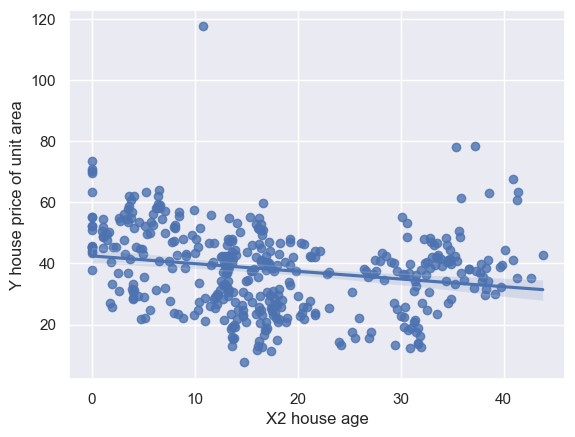

In [54]:


sns.regplot(data =df, x="X2 house age", y = "Y house price of unit area")



### Plot Distance to MRT station Vs Price

<Axes: xlabel='Y house price of unit area', ylabel='X3 distance to the nearest MRT station'>

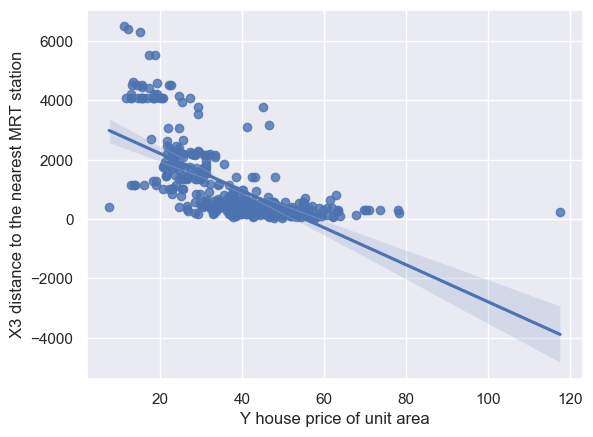

In [55]:
sns.regplot(data = df, x ="Y house price of unit area", y = "X3 distance to the nearest MRT station" )

### Plot Number of Convienience Stores Vs Price

<Axes: xlabel='Y house price of unit area', ylabel='X4 number of convenience stores'>

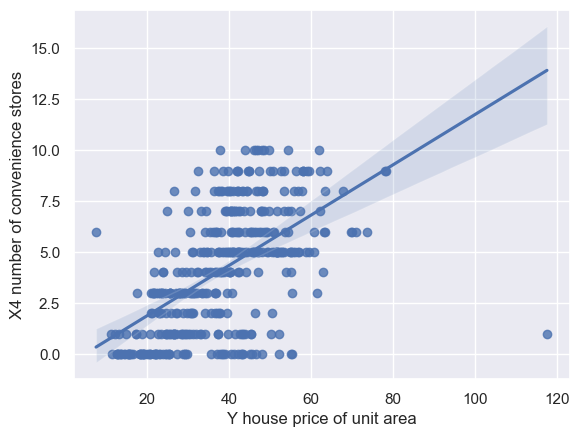

In [57]:
sns.regplot(data =df, x ="Y house price of unit area", y = "X4 number of convenience stores" )